Construindo um modelo que seja capaz de prever a taxa média de ocupação por proprietários de casas na região de Boston (EUA).

Variável target: Valor numérico que representa a mediana da taxa de ocupação (em $1000s)

Dataset: https://www.kaggle.com/competitions/boston-housing

<img src="https://cdn.vox-cdn.com/thumbor/ytWQXLrdk_BlB8dVhImYurfR3NY=/0x0:5854x3903/1200x675/filters:focal(2459x1484:3395x2420)/cdn.vox-cdn.com/uploads/chorus_image/image/63307699/shutterstock_1524900662.15.jpg">

---

<h3>Data description</h3>

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

*crim*
  * per capita crime rate by town.

*zn*
  * proportion of residential land zoned for lots over 25,000 sq.ft.

*indus*
  * proportion of non-retail business acres per town.

*chas*
  * Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

*nox*
  * nitrogen oxides concentration (parts per 10 million).

*rm*
  * average number of rooms per dwelling.

*age*
  * proportion of owner-occupied units built prior to 1940.

*dis*
  * weighted mean of distances to five Boston employment centres.

*rad*
  * index of accessibility to radial highways.

*tax*
  * full-value property-tax rate per \$10,000.

*ptratio*
  * pupil-teacher ratio by town.

*black*
  * 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

*lstat*
  * lower status of the population (percent).

*medv*
  * median value of owner-occupied homes in \$1000s.

---

*Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.*

*Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.*

**Warning**

The Boston housing prices dataset has an ethical problem: as investigated in [1], the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices [2].

[1] https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8

[2] https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air

---

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl

In [2]:
# Desabilitando o Warning dito acima
import warnings
warnings.filterwarnings("ignore")

# Load
from sklearn.datasets import load_boston
boston = load_boston()

# DataFrame
df = pd.DataFrame( boston.data, columns = boston.feature_names )
df['TARGET'] = boston.target

# Análise Exploratória

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Estatística da variável target
df['TARGET'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: TARGET, dtype: float64

In [5]:
# Valor medio
valor_medio_previsao = df['TARGET'].mean()
print(f'Valor medio = {valor_medio_previsao:.2f}')

Valor medio = 22.53


In [6]:
# Cálculo do SSE para verificar se os valores são próximos da média
# (sum of squares for error) -> (previsto - observado)^2
sse_series = pd.Series( valor_medio_previsao - df['TARGET'] ) ** 2
SSE = sum(sse_series)

print(f'Sum of Squared errors = {SSE:.2f}')

Sum of Squared errors = 42716.30


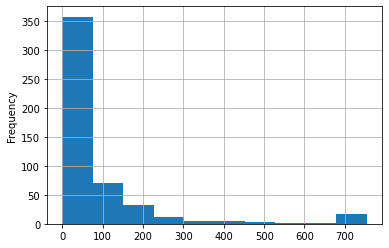

In [7]:
# Verificando a frequência dos erros
sse_series.plot( kind = 'hist' )
plt.grid(True)

Nota-se que a maioria dos erros são pequenos, o que indica que os dados se aproximam da média. O que poderá ser comprovado pelo teorema central do limite, já que quando o tamanho da amostra aumenta, a distribuição amostral da sua média se aproxima cada vez mais de uma distribuição normal.

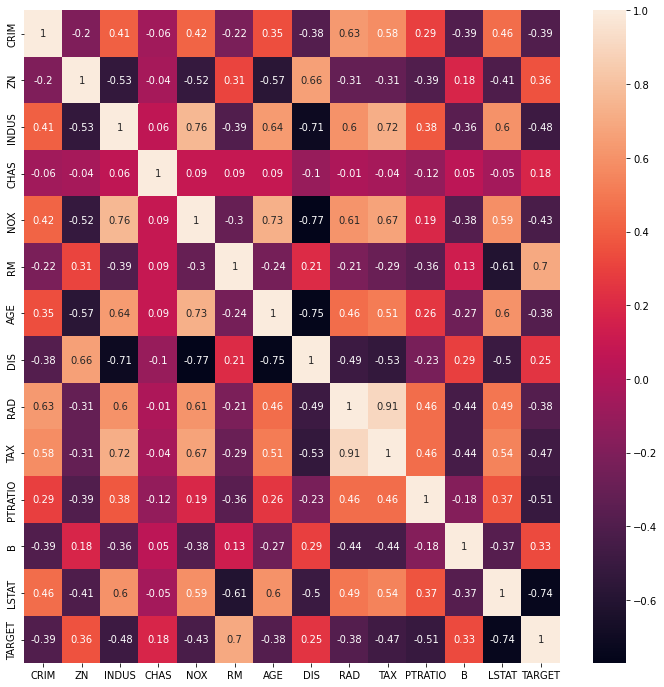

In [8]:
# Correlação entre as variáveis
import seaborn as sns

plt.figure( figsize = (12,12) )
sns.heatmap( df.corr().round(2), annot = True )

 ---

Realizando uma **regressão linear simples** para verificar se a variável 'LSTAT' (lower status of the population (percent)) tem correlação no preço da habitação.

In [9]:
# Desvio padrão da variável 'crim'
np.std(df['LSTAT'])

7.134001636650485

In [10]:
# Correlação
from scipy.stats.stats import pearsonr

pearsonr( df['LSTAT'], df['TARGET'] )[0]

-0.737662726174015

Ou seja, a variável LSTAT influencia negativamente a variável TARGET.

OBS: Porém, não é porque LSTAT acontece junto de TARGET que LSTAT cause TARGET (correlação e causalidade).

---

Construindo um modelo de regressão linear com o **StatsModels**

1. https://www.statsmodels.org/stable/index.html
2. https://www.statsmodels.org/stable/py-modindex.html

In [11]:
import statsmodels.api as sm

In [12]:
# Variáveis dependente e independente
X = df['LSTAT']
y = df['TARGET']

# O StatsModels requer uma matriz de entrada (variáveis explanatórias e os valores constantes)
# Os valores constantes são os coeficientes aprendidos durante o treinamento
# Por isso, precisamos adicionar os valores dos coeficientes à variável X
X = sm.add_constant(X)

X.head()

,const,LSTAT
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [13]:
# Criação do modelo
regressao = sm.OLS( y, X )

# Treinamento do modelo
regressao_v1 = regressao.fit()

print( regressao_v1.summary() )
print('*'*78)
print('Estes são os parâmetros aprendidos durante o treinamento do modelo:')
print( regressao_v1.params )

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           5.08e-88
Time:                        18:39:55   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [14]:
# Print da previsão dos dados
previsoes = regressao_v1.predict(X)
previsoes

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
         ...    
501    25.366864
502    25.927393
503    29.195563
504    28.397521
505    27.067452
Length: 506, dtype: float64

In [15]:
# Passando a média de LSTAT como constante
# E adicionando a constante 1 para se tornar uma matriz
LM = np.mean( df['LSTAT'] ).round(1)
Xp = np.array( [1, LM] )

print(f'Para o caso em que LSTAT = {LM}, o modelo prevê que a mediana da taxa de ocupação é de {regressao_v1.predict(Xp).round(2)}')

Para o caso em que LSTAT = 12.7, o modelo prevê que a mediana da taxa de ocupação é de [22.49]


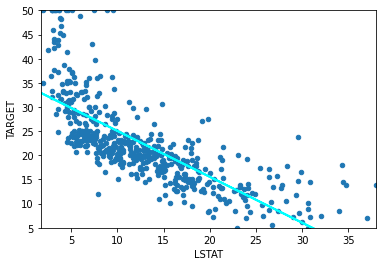

In [16]:
# Plots

X_range = [ df['LSTAT'].min(), df['LSTAT'].max() ]
y_range = [ df['TARGET'].min(), df['TARGET'].max() ]

# Scatter plot
scatter_regression = df.plot( kind = 'scatter', x = 'LSTAT', y = 'TARGET', xlim = X_range, ylim = y_range )

# Regression Line
previsoes = regressao_v1.predict(X)
regression_line = scatter_regression.plot( df['LSTAT'], previsoes, color = 'cyan', linewidth = 2 )

---
Calculando os **resíduos**

In [17]:
previsoes = regressao_v1.predict(X)

# Residuos
residuos = df['TARGET'] - previsoes

In [18]:
residuos

0      -5.822595
1      -4.270390
2       3.974858
3       1.639304
4       6.709922
         ...    
501    -2.966864
502    -5.327393
503    -5.295563
504    -6.397521
505   -15.167452
Length: 506, dtype: float64

In [19]:
residuos.describe().round(2)

count    506.00
mean       0.00
std        6.21
min      -15.17
25%       -3.99
50%       -1.32
75%        2.03
max       24.50
dtype: float64

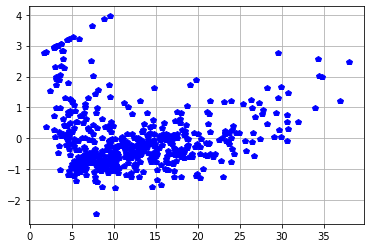

In [20]:
# Normalizando os dados para plotagem
residuos_normalized = (residuos - np.mean(residuos)) / np.std(residuos)

# Plot
residual_scatter_plot = plt.plot( df['LSTAT'], residuos_normalized, 'bp' )
plt.grid()

---
Modelo de **Regressão Linear Simples com Scikit-Learn** 

>um pacote melhor para a linguagem Python do que StatsModels.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [21]:
from sklearn import linear_model

In [22]:
# O Scikit learn requer os dados em forma de matriz (por isso do reshape) e não em forma de vetor
X = df['LSTAT'].values.reshape(( len(df), 1 ))    # matriz len(df) vs 1
y = df['TARGET'].values    # a variável target pode ser um vetor

In [23]:
# Criando o objeto
regressao_skl = linear_model.LinearRegression( normalize = False, fit_intercept = True ) # fit_intercep retorna todos os parâmetros aprendidos durante o treinamento

# Treinamento
regressao_skl.fit(X, y)

LinearRegression(normalize=False)

In [24]:
# Mostrando os coeficientes aprendidos: coef e intercept (que são os coeficientes de regressão linear simples)
print( regressao_skl.coef_ )
print( regressao_skl.intercept_ )

[-0.95004935]
34.5538408793831


In [25]:
# Valores preditos
pred_reg_skl = regressao_skl.predict(X)

In [26]:
# Passando a média de LSTAT como constante
# E adicionando a constante 1 para se tornar uma matriz
LM = np.mean( df['LSTAT'] ).round(1)
Xp = np.array( LM ).reshape(-1, 1)

print(f'Para o caso em que LSTAT = {LM}, o modelo prevê que a mediana da taxa de ocupação é de {regressao_skl.predict(Xp).round(2)}')

Para o caso em que LSTAT = 12.7, o modelo prevê que a mediana da taxa de ocupação é de [22.49]


In [27]:
Xp

array([[12.7]])

---
Em termos de comparação entre StatsModels e Scikit-Learn:

```python
# sklearn
from sklearn import linear_model
linear_regression_sk = linear_model.LinearRegression( normalize = False, fit_intercept = True)
linear_regression_sk.fit( X, y )
linear_regression_sk.predict( new_X ) 
```

```python
# StatsModels
import statsmodels.api as sm
linear_regression_sm = sm.OLS( y, sm.add_constant(X) )
linear_regression_sm.fit()
linear_regression_sm.predict( new_x )
```

>Em termos de velocidade, o Sk Learn é mais eficiente.

>Em termos de interpretação estatística, o StatsModels mostra-se mais claro.

---
Métodos de minimização da Cost Function (função que calcula o erro):

Ex.
- Pseudo-inversão
- Fatorização
- Gradiente Descendente

Relembrando as métricas de avaliação dos erros:

<img src="https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Vale lembrar que ao elevarmos ao quadrado ou usarmos módulo, evitamos que os erros positivos (ex. +10) compense o erro negativo (-10), e vice versa.

> Em geral, preferimos o 'erro ao quadrado' ao invés do erro absoluto, pois com a diferença ao quadrado, temos a minimização mais próxima da média, diferente da 'diferença absoluta' em que a otimização se aproxima da mediana. Porém, caso haja outliers na base de dados, a média seria afetada.

---
<h3>Minimizando a cost function com Pseudo Inversão</h3>

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/v1633656949/moore-penrose-pseudoinverse-matrix_vrmr0j.png">

In [28]:
# Transformando LSTAT em formato de matriz
X = df['LSTAT'].values.reshape(( len(df), 1 ))
# Adicionando a coluna de "1's" em X  
Xb = np.column_stack(( X, np.ones( len(df) ) ))
# Vetor da variável target
y = df['TARGET'].values

In [29]:
# Resolvendo a equação utilizando numpy
np.linalg.solve( np.dot(Xb.T, Xb), np.dot(Xb.T, y) )

array([-0.95004935, 34.55384088])

---
<h3>Minimizando a cost function com **Gradient Descent** </h3>

* Melhor opção na maioria dos casos

No começo, precisamos **inicilizar** os valores dos coeficientes, para que o algoritmo possa "caminhar" rumo ao local com o menor erro.<br>
Também precisaremos fornecer o tamanho da "**passada**" da "caminhada", ou velocidade de treinamento. Caso a passada seja muito pequena, corremos o risco de ficarmos em um local de platô ou mínimo local. Se a passada for muito grande, podemos pular o local ideal.<br>
Por fim, o cálculo (**gradiente**) da diferença entre a passada anterior e a passada atual atualizará os coeficientes na próxima passada, a fim de **minimizar os erros**. Se essa nova passada for algo bom, o coeficiente é atualizado.

<img src="https://miro.medium.com/max/1400/1*tQTcGTLZqnI5rp3JYO_4NA.png">

Calculando o gradiente descendente utilizando Python:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png">

- Precisamos encontrar os melhores pesos/coeficientes (theta)
- Alpha é o valor da taxa de aprendizado

In [30]:
# Definindo x e y

X = df['RM'].values.reshape(( len(df), 1 )) 
X = np.column_stack(( X,np.ones( len(df) ) )) 
y = df['TARGET'].values 

In [31]:
# Random init
import random
def rand_init( w ):
  return np.array( [np.random.normal() for peso in range(w)] )

# Valores aproximados para X e y
def hypothesis( X, w ):
  return np.dot( X, w )

# Lost function
def loss_func( X, w, y ):
  return hypothesis( X, w ) - y

# Squared Loss
def squared_loss( X, w, y ):
  return loss_func( X, w, y ) ** 2

# Cálculo gradient
def gradient( X, w, y ):
  gradients = list()
  for peso in range( len(w) ):
    gradients.append( np.sum( loss_func( X, w, y ) * X[:, peso] ) / float(len(y)) )
  return gradients

# Update dos coeficientes
def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

# Otimização do modelo
def optimize( X, y, alpha = 0.01, eta = 10 ** -12, iterations = 1000 ):
    w = rand_init( X.shape[1] )
    path = list()
    for k in range(iterations):
        SSL = np.sum( squared_loss( X, w, y ) )
        new_w = update( X, w, y, alpha = alpha )
        new_SSL = np.sum( squared_loss( X, new_w, y ) )
        w = new_w
        if k >= 5 and ( new_SSL - SSL <= eta and new_SSL - SSL >= -eta ):
            path.append(new_SSL)
            return w, path
        if k % ( iterations / 20 ) == 0:
            path.append( new_SSL )
    return w, path

In [32]:
# Definindo o valor de alfa
# Alfa é chamado de taxa de aprendizagem
alpha = 0.005

# Otimizando a Cost Function
w, path = optimize( X, y, alpha, eta = 10**-12, iterations = 50000 )

In [33]:
# Imprimindo o resultado
print(f'Valor dos Coeficientes ao final do treino {w}')

Valor dos Coeficientes ao final do treino [8.831506947432754, -32.94928930611101]


In [34]:
# Imprimindo o resultado
print(f'Caminho do Gradiente mostrando o erro ao quadrado\n{path}')

Caminho do Gradiente mostrando o erro ao quadrado
[203352.93319320213, 27645.15403900605, 26195.59258395696, 25122.374488518024, 24327.791356933194, 23739.502400865098, 23303.948357399047, 22981.47532297806, 22742.724565204924, 22565.959632163023, 22435.087412762565, 22338.192980614418, 22266.45483004035, 22213.341744657708, 22174.01817949343, 22144.904021163355, 22123.348645608574, 22107.389598809423, 22095.573930180028, 22086.825912399472]


---
<h3>Regressão Linear Múltipla</h3>

<img src="https://slideplayer.com.br/slide/3684457/17/images/2/Regress%C3%A3o+Linear+M%C3%BAltipla.jpg" width=40%> <br>
font-img: https://slideplayer.com.br/slide/3684457/

Explicamos uma variável target com base em mais de uma variável explanatória.

---
Interpretando os Modelos de Regressão

1. Teste De significância Individual (teste para cada variável explanatória).
  - Quais variáveis se relacionam com a variável target?
  -  Se o valor de p for menor que 0.05 (F < 0.05), há evidências estatísticas.
  - Deve-se ficar atento ao problema de colinearidade (2 variáveis representam a mesma informação. Ex. idade e data de nascimento; isso reduz a significância estatística dessas variáveis e pode levar a uma exclusão errônea).
2. Test F de Significância Global (resultado final do modelo)
  - Verifica se o modelo é útil para prever a variável target (há evediências de que pelo menos uma variável no modelo se relaciona com a variável target?
  - Se o valor de p for menor que 0.05 (F < 0.05), há evidências estatísticas. [F = F de significação]
  - Ex. <br><img src="https://blog.minitab.com/hs-fs/hubfs/analise-de-variancia.jpg?width=334&name=analise-de-variancia.jpg">
  - font-img: https://blog.minitab.com/pt/entendendo-analise-de-variancia-anova-e-o-teste-f
3. Coeficientes R2 / R2 ajustado (compara-se 2 modelos)
  - R²:
    - Qual % de variabilidade é explicado pelas variáveis utilizadas?
    - Ex. Caso se use as variáveis "num_portas" e "km_rodados" para prever o preço de um carro, qual porcentagem (%) da variabilidade do preço é explicada por esse modelo (ex. 35% ou 0.35), ou seja, mostra se precisamos de mais variáveis ou não para explicar o modelo.
  - R² ajustado:
    - Usado para comparar modelos com quantidade de variáveis diferentes.
  - Também há o R múltiplo, que mede a “força” ou “grau” de relacionamento linear entre a variável dependente e o conjunto das variáveis independentes.
4. Demais coeficientes do treinamento
  - Estes são os valores aprendidos no treinamento, como B0 (interseção), B1 (ex. num portas), B2 (ex. km rodados) ...
  - Ao final do treinamento, colocamos estes valores finais na fórmula de regressão para obtermos o valor de y.

---
Mas o que é o **valor p**?:

Caso tenhamos um grupo randomico selecionado de uma população e um grupo formado por cidadões de uma cidade qualquer, e desejamos saber a previsão de votação da população:
- Um hipótese nula significa que não há diferença entre os dois grupos, a alternativa nos dira que há uma diferença estatisticamente significante.
  - Qual a probabilidade deste efeito ter sido atribuído ao acaso? O valor p nos dará a força da hipótese. Ou seja, caso p>0,05, mais de uma a cada 20 vezes o experimento não mostra diferença entre os grupos.
  - O valor α = 0.05 (nível de significância) como referência.
  - Em resumo, caso p seja muito menor que 0.05, a variável deve ser considerada significativa. 

Exemplo do valor P para a variável 'LSTAT'

* Repare em P>|t|, que indica que é improvável observar uma associação tão substancial entre o preditor e a resposta devido ao acaso. <br>Ou seja, **há uma associação entre o preditor e a resposta!** [rejeita-se a hipótese nula]. <br>Caso o valor de p fosse muito alto, significaria o contrário.
* 'const' significa B0 enquanto 'LSTAT' significa B1

Em resumo:
* p = 0, impossível ser devido ao acaso
* p = 0.001, muito improvável ser devido ao acaso
* p = 0.05, basta improvável de ser devido ao acaso
* p = 0.5, bastante provável de ser devido ao acaso
* p = 0.75, muito provavelmente é devido ao acaso
* p = 1, absoluta certeza de ser devido ao acaso

In [35]:
# Variáveis dependente e independente
X = df['LSTAT']
y = df['TARGET']
X = sm.add_constant(X)

regressao = sm.OLS( y, X )

regressao_v1 = regressao.fit()

print( regressao_v1.summary() )

                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           5.08e-88
Time:                        18:40:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

---
<h4>Regressão Linear Múltipla para o dataset de Boston</h4>






In [36]:
X = df.iloc[:,0:-1] # Tudo com exceção da variável target
y = df['TARGET'].values # Taxa média de ocupação

In [37]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


---
Método com StatsModels

In [38]:
# Adicionando a constante para o statsmodels
Xc = sm.add_constant( X )

# Criação do modelo
model = sm.OLS( y, Xc )

# Treinamento
model_1 = model.fit()

print( model_1.summary() )

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        18:40:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Repare que o valor de R² é de 0.741, ou seja, estas variáveis conseguem explicar cerca de 75% dos dados.

Podemos ver que as variáveis 'AGE' e 'INDUS' apresentam um alto valor de p, ou seja, não há associação entre estas variáveis e a variável target, indicando que talvez possamos removê-las do modelo.

<font color=cyan>Lembre-se que o resultado de p não é uma afirmação 100% verdadeira, mas sim, um indicativo. Use também a informação de correlação etc.
</font>

Calculando a correlação entre as variáveis explanatórias novamente

In [39]:
# Formato de tabela
X = df.iloc[:,0:-1]
matriz_correlacao = X.corr()

matriz_correlacao

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


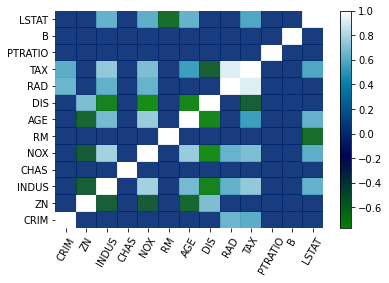

In [40]:
# Forma gráfica

def correlation_matrix(variaveis_explicatorias, obstaculo = 0.0):
    CC = np.corrcoef( variaveis_explicatorias, rowvar = 0 )
    CC[ np.where( np.abs(CC) < obstaculo ) ] = 0.0
    heatmap = plt.pcolormesh( CC, cmap = mpl.cm.ocean, alpha = .9 )
    heatmap.axes.set_frame_on( False )
    heatmap.axes.set_yticks( np.arange( CC.shape[0] ) + 0.5)
    heatmap.axes.set_xticks( np.arange( CC.shape[1] ) + 0.5)
    heatmap.axes.set_xticklabels( df.columns[:-1] )
    plt.xticks( rotation = 60 )
    heatmap.axes.set_yticklabels( df.columns[:-1] )
    plt.colorbar()
    plt.show()

correlation_matrix(X, obstaculo = 0.5)    

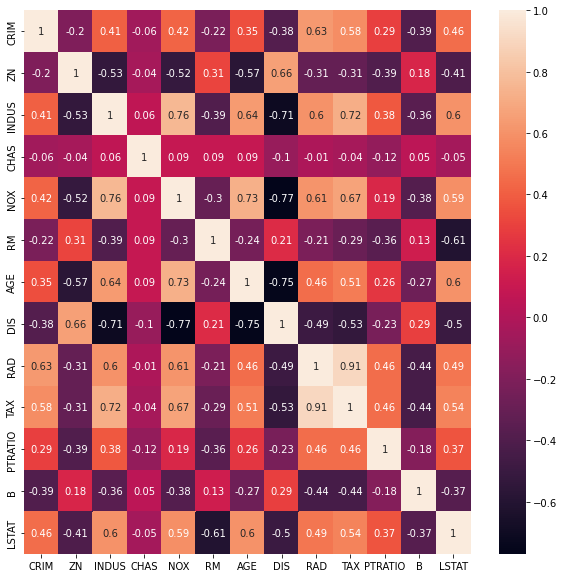

In [41]:
# Correlação entre as variáveis graficamente com seaborn
import seaborn as sns

plt.figure( figsize = (10,10) )
sns.heatmap( matriz_correlacao.round(2), annot = True )

O que nos mostra uma forte correlação entre 'AGE' e 'DIS', por exemplo, e ainda maior entre 'RAD' e 'TAX' [cerca de 0.91], o que faz sentido, já que quão mais próximo de uma rodovia uma casa está, mais cara e portanto, maior a taxa de impostos.

Nestes casos devemos prestar atenção à multicolinearidade, que pode deixar o modelo tendencioso.

---
<h3> Engenvaluese Eigenvectors</h3> (traduz.: autovalores e autovetores)

Vídeo explicativo ritikmath: https://www.youtube.com/watch?v=glaiP222JWA&ab_channel=ritvikmath


Os autovetores são uma maneira de recombinar a variância entre as variáveis, criando novos recursos acumulando a variância compartilhada (usada em PCA).

Ou seja, os **autovalores** representam a quantidade de variância recombinada para cada nova variável e os **autovetores** tratam de matriz que dizem como essas novas variáveis se relacionam com as antigas. Isso é útil para verificar se há multicolinearidade.

Autovetores com python

In [42]:
# Calculando os coeficientes de correlação
corr = np.corrcoef( X, rowvar = False )

# Gerando autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig( corr )

Obs: valores próximos de zero ou pequenos comparando-se com os outros valores podem representar um problema para equações normais ou métodos de otimização que se baseiam em inversão matricial.

In [43]:
# Representação total das variáveis
print( eigenvalues )

[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]


In [44]:
# Como o menor valor está na posição 8, buscamos por esta posição no autovetor
print( eigenvectors[:,8] )

[-0.0459523   0.08091897  0.25107654 -0.03592171 -0.04363045 -0.0455671
  0.03855068  0.01829854  0.63348972 -0.72023345 -0.02339805  0.00446307
 -0.02443168]


In [45]:
# Por fim, buscamos quais são as variáveis que mais contribuem com seus valores
# para construir o autovetor (maiores valores no autovetor)

X_var = df.columns[:-1]

print( X_var[2], X_var[8], X_var[9] )

INDUS RAD TAX


Com isso, devemos pensar sobre o que fazer com essas variáveis, por exemplo, removê-las.

---
Implementando o Gradient Descent com regressão linear múltipla

In [47]:
df_vars = df.columns
X = df.iloc[:,:-1]

<h4>Refazendo a escala dos dados (Feature Scaling)</h4>

Como agora trabalhamos com mais variáveis, precisamos realizar o processo de **padronização** (busca a variância dividingo a médio pelo desvio padrão) ou **normalização** (escala os dados de 0 até 1)

In [48]:
# Realizando a padronização com StandarScaler
from sklearn.preprocessing import StandardScaler

standard_object = StandardScaler()
df_scaled = standard_object.fit_transform( X )

É possível verificar as medias e escalas utilizadas com: <br>
```python
standard_object.mean_
standard_object.scale_
```
E para retornar os coeficientes em ordem de importância: <br>
`model.coef_`

In [70]:
# Gerando o novo X padronizado e y
df_var_names = df.columns
X_scaled = np.column_stack(( df_scaled, np.ones(len(df)) ))
y = df['TARGET'].values

Reutilizando as funções anteriormente criadas

In [54]:
# Random init
import random
def rand_init( w ):
  return np.array( [np.random.normal() for peso in range(w)] )

# Valores aproximados para X e y
def hypothesis( X, w ):
  return np.dot( X, w )

# Lost function
def loss_func( X, w, y ):
  return hypothesis( X, w ) - y

# Squared Loss
def squared_loss( X, w, y ):
  return loss_func( X, w, y ) ** 2

# Cálculo gradient
def gradient( X, w, y ):
  gradients = list()
  for peso in range( len(w) ):
    gradients.append( np.sum( loss_func( X, w, y ) * X[:, peso] ) / float(len(y)) )
  return gradients

# Update dos coeficientes
def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

# Otimização do modelo
def optimize( X, y, alpha = 0.01, eta = 10 ** -12, iterations = 1000 ):
    w = rand_init( X.shape[1] )
    path = list()
    for k in range(iterations):
        SSL = np.sum( squared_loss( X, w, y ) )
        new_w = update( X, w, y, alpha = alpha )
        new_SSL = np.sum( squared_loss( X, new_w, y ) )
        w = new_w
        if k >= 5 and ( new_SSL - SSL <= eta and new_SSL - SSL >= -eta ):
            path.append(new_SSL)
            return w, path
        if k % ( iterations / 20 ) == 0:
            path.append( new_SSL )
    return w, path

In [67]:
# Resultado da otimização
alpha = 0.005

# Otimizando a Cost Function
w, path = optimize( X_scaled, y, alpha, eta = 10**-12, iterations = 50000 )

# Imprimindo o resultado
print(f'Valor dos Coeficientes ao final do treino {w}')

Valor dos Coeficientes ao final do treino [-0.9281454319454352, 1.0815675142856482, 0.14089654180670452, 0.6817402191012749, -2.0567176656007145, 2.674230792294195, 0.019465541155950932, -3.104044509894969, 2.6622089249375853, -2.0767717726154533, -2.060606336923027, 0.8492683562884025, -3.7436267902595524, 22.53280632411033]


In [69]:
# Rescaling

df_explanatory_trained_coef = w[:-1]

betas_rescaled = df_explanatory_trained_coef / standard_object.scale_
vies_rescaled = df_explanatory_trained_coef - np.sum( ( standard_object.mean_ / standard_object.scale_ ) * df_explanatory_trained_coef )

In [76]:
# Mostrando os betas finais para cada variável

# Printando cada variável do df e mostrando seu respectivo beta (Coeficiente) final
for beta, variable_name in zip(betas_rescaled, df_var_names):
  print(f'Variable name: {variable_name:9s}, Beta: {beta:.3f}')

Variable name: CRIM     , Beta: -0.108
Variable name: ZN       , Beta: 0.046
Variable name: INDUS    , Beta: 0.021
Variable name: CHAS     , Beta: 2.687
Variable name: NOX      , Beta: -17.767
Variable name: RM       , Beta: 3.810
Variable name: AGE      , Beta: 0.001
Variable name: DIS      , Beta: -1.476
Variable name: RAD      , Beta: 0.306
Variable name: TAX      , Beta: -0.012
Variable name: PTRATIO  , Beta: -0.953
Variable name: B        , Beta: 0.009
Variable name: LSTAT    , Beta: -0.525


---
Visto o trabalho feito até o momento, devemos então identificar quais são as variáveis importantes para o modelo.

Vejamos quais são as variáveis importantes após fazermos a padronização delas.

In [85]:
# Dados
X = df.iloc[:, 0:-1]
y = df['TARGET'].values

# Criação do modelo
from sklearn import linear_model
reg_model = linear_model.LinearRegression( fit_intercept = True )

# Padronização dos dados
from sklearn.preprocessing import StandardScaler
standard_object = StandardScaler()

# Passando os objetos para o pipeline para serem padronizados
from sklearn.pipeline import make_pipeline
linear_reg_beta_padronizado = make_pipeline( standard_object, reg_model )

# Treinamento do modelo padronizando os dados
linear_reg_beta_padronizado.fit( X, y )

# Mostrando os betas (coeficientes) finais para as variáveis
for beta, variable in sorted( zip( linear_reg_beta_padronizado.steps[1][1].coef_, df_var_names ) ):
  print(f'{variable:9s} = {abs(beta):.2f}')

LSTAT     = 3.74
DIS       = 3.10
TAX       = 2.08
PTRATIO   = 2.06
NOX       = 2.06
CRIM      = 0.93
AGE       = 0.02
INDUS     = 0.14
CHAS      = 0.68
B         = 0.85
ZN        = 1.08
RAD       = 2.66
RM        = 2.67


Verificando a explicabilidade das variáveis usando R²

In [87]:
from sklearn.metrics import r2_score

# Passando o valor observado original (y) e as previsões do treinamento (fit(X,y)) vs as previsões do modelo (X)
r2_score( y, reg_model.fit( X, y ).predict( X ) )

0.7406426641094095

Verificando a explicabilidade de cada variável individualmente com R²

In [96]:
r2_variables_df = []

# Função para calcular o R²
def r2( X, y, model_name ):
    return r2_score( y, model_name.fit( X,y ).predict( X ) )

num_variables_df = len(X.columns) # 13

for i in range( num_variables_df ):
  aux = [cont for cont in range( num_variables_df ) if cont != i]

  r2_variables_df.append((( r2( X, y, reg_model ) - r2( X.values[:, aux], y, reg_model ) ), df.columns[i] ) )

for beta, variable_name in sorted( r2_variables_df, reverse =  True ):
  print( f'{variable_name:9s} = {beta:.3f}' )

LSTAT     = 0.056
RM        = 0.044
DIS       = 0.029
PTRATIO   = 0.028
NOX       = 0.011
RAD       = 0.011
B         = 0.006
ZN        = 0.006
CRIM      = 0.006
TAX       = 0.006
CHAS      = 0.005
INDUS     = 0.000
AGE       = 0.000


Ou seja, a variável 'LSTAT' explica o modelo em 5,6%, a variável 'CRIM' explica 0.6%' ...

---
Realizando a previsão com Regressão Linear Múltipla utilizando as 4 variáveis mais relevantes segundo o ranking feito acima

In [99]:
# Atribuindo as variáveis mais importantes à X_new
X_new = df[['RM', 'DIS', 'PTRATIO', 'LSTAT']]
y = df['TARGET'].values

X_new.sample(5)

,RM,DIS,PTRATIO,LSTAT
200,7.135,7.6534,17.0,4.45
300,6.871,7.8278,14.8,6.07
7,6.172,5.9505,15.2,19.15
64,7.104,9.2229,18.6,8.05
485,6.312,3.9917,20.2,10.58


In [103]:
# Divisão treino/teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size = 0.3, random_state = 42 )

# Criação do modelo
model_reg_lin = linear_model.LinearRegression( fit_intercept = True, normalize = False )

# Treinamento do modelo
model_reg_lin_fit = model_reg_lin.fit( X_train, y_train )

In [105]:
# Calculo da métrica R2 (explicabilidade do modelo com estas variáveis)
r2_score( y_test, model_reg_lin_fit.fit( X_train, y_train ).predict( X_test ) )

0.661383670138217

Obs: Mesmo com um R2 menor que o modelo com todas as variáveis, o modelo com todas elas pode estar tendencioso!

Colocando novos valores (neste caso utilizando a parte inteira da média) para ver o resultado de previsão do nosso modelo

In [111]:
RM      = int( np.mean( df.RM ) )
DIS     = int( np.mean( df.DIS ) )
PTRATIO = int( np.mean( df.PTRATIO ) )
LSTAT   = int( np.mean( df.LSTAT ) )

new_house_atributes = [RM, DIS, PTRATIO, LSTAT]

# Formatando na dimensão correta para o sk learn
new_house = np.array( new_house_atributes ).reshape(1,-1)

# Prevendo
print(f'Média da taxa de ocupação (em $1000s): {model_reg_lin_fit.predict( new_house )}')

Média da taxa de ocupação (em $1000s): [22.61114606]
